# Group Project: Data-driven Business Manager with APIs

#### Number of points: 30 (weights 30% in the final grade)
#### Deadline to form the groups: October 18th at 12:30 pm CET
#### Deadline for the code submission: October 24th at 01:29 pm CET
#### Presentations on October 24th

## Objective
In this project, you will create a Business that utilizes various APIs to make informed decisions about running your local business. If you want to sell drinks or street food or whatever floats your boat, do not hesitate to find your data and design the project accordingly. You will collect data from meteorological and non-meteorological APIs to help your business determine when, where, and how much inventory is needed to maximize sales. 

## Grading

In total, the group project counts for 30% of the final grade and represents 30 points.

The points are distributed in two parts: the code and the presentation.

- Some items e.g. Statistics are represented in both parts and will require to compute them in the code **and** present them during the presentation.
- Please note that the data must come from an API. You need to use at least 3 APIs (weather + two others). You can also of course use data downloaded from the internet, however they cannot replace the API data.
- Additionally, emphasis will be put on the **Storytelling** and whether or not the choice of APIs, data processing, statistics and visualisations are relevant for your business.
- To make grading easier, please provide **clean code** with **relevant comments** to make it straightforward what you are doing.
- Everyone in the group project must present during presentation day. **A penalty of -2 points** will be applied to each person **who does not present a significant part** during the presentation.


| **Code** | **15 points** |
| --- | --- |
| A. Collect data from weather API | 3 points |
| B. Collect data from two other non-meteorological APIs | 4 points |
| C. Data cleaning and processing | 3 points |
| D. Compute relevant statistics | 2 points |
| E. Clean and clear visualisations  | 3 points |


| **Presentation** | **15 points** |
| --- | --- |
| 1. Description of unique business idea | 1 point |
| 2. Presentation of all the APIs used and how it serves your business | 3 points |
| 3. Presentation of the data cleaning and processing | 2 points |
| 4. Presentation of the statistics | 2 points |
| 5. Presentation of the visualisations and how they serve the business| 3 points |
| 6. Storytelling | 4 points |

**Penalty: -2 points to each person who does not present a significant part during the presentation.**


**Penalty for unexcused absence or lateness**: 
- If you are absent or late on presentation day without an official excuse, you will receive 0 for the presentation part of the group project.
- If you are late without an official excuse and can still make it to the presentation of your team, you will still receive 0 for the presentation part of the group project.

## Getting Ready
#### Recommended deadline: October 8th
#### Deadline: October 18th at 12:30 pm CET

1. Form your group and select a group name. Communicate your group name to the teacher along with the First Name and Last Name of all the team members.

2. Create a branch on the **Students** repository with your group name (exactly the same as the one communicated to the teacher).

3. Discuss with your group and answer the following questions:

   - What kind of business do we run? What do we sell ? The choice of the business must be original and unique to your group.
   - How do we name our business?
   - When do we operate? Is it an all-year-round business or a seasonal one? If so, which seasons? Which months / weeks / days / hours of the day do we operate?
   - Where do we operate? In which countries / cities are we currently active ? Where do we want to develop in the future ? Determine where to set up your business stand based on weather conditions, local attractions, or events. The location should maximize customer traffic and sales.

## Code | A. Collect data from weather API | 3 points
#### Recommended deadline: October 18th
#### Deadline: October 24th at 01:29 pm CET
Use the OpenWeatherMap API to fetch weather data for your chosen location. You can select any city or location for your business.

- Fetch your chosen location's current temperature and weather conditions.
- Fetch the forecasted weather data for the next few days (e.g., five days).

In [1]:
import requests

api_key = "cf4c2a40050f1c31dbd700bdc269eb1f"
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
city = 'Berlin'
complete_url = f"{base_url}q={city}&appid={api_key}&units=metric"

In [2]:
response = requests.get(complete_url)

# Check if the response is valid (status code 200)
if response.status_code == 200:
    data = response.json()
    
    # Extract temperature and weather description
    current_temp = data['main']['temp']
    weather_desc = data['weather'][0]['description']
    
    # Output the data
    print(f"Current Temperature in {city}: {current_temp}°C")
    print(f"Weather Description: {weather_desc}")
else:
    print(f"Error fetching data: {response.status_code}")

Current Temperature in Berlin: 16.45°C
Weather Description: clear sky


## Code | B. Collect data from two other APIs | 4 points
#### Recommended deadline: October 18th
#### Deadline: October 24th at 01:29 pm CET
Integrate with **at least two** of the non-meteorological APIs you've learned about based on the location and the season.

It has to be with an API (not a downloaded dataset). 

You can of course use a downloaded dataset on top of the two APIs you've chosen.

You can also use more APIs, sky is the limit!

You can choose from:
- Google Maps,
- TripAdvisor,
- News API,
- Yelp,
- Wikipedia,
- Booking,
- Amadeus Travel API,
- Foursquare,
- etc. (make your own research and be original!)

Each API can provide different types of information. Pick the ones that best suit your application.


After collecting all the data you need, save them.

In [1]:
# Read the token from the file
with open('token.txt', 'r') as file:
    # Read the content and store it in a string
    api_key = file.read().strip()


In [2]:
from serpapi import GoogleSearch

params = {
  "engine": "google_events",
  "q": "Events in Berlin",
  "hl": "en",
  "gl": "us",
  "api_key": api_key
}

search = GoogleSearch(params)
results = search.get_dict()
events_results = results["events_results"]

In [14]:
print(f"Successfully retrieved {len(events_results)} events")

Successfully retrieved 10 events


In [27]:
address = " ".join(events_results[0].get('address'))

In [28]:
address

'Hole⁴⁴, Hermannstraße 146 Berlin, Germany'

In [41]:
f"{events_results[0].get('address')[0].split(', ')[1]} {events_results[0].get('address')[1]}"

'Hermannstraße 146 Berlin, Germany'

In [42]:
events = []
for event in events_results:
    current_event = {
        "name": event['title'],
        "date": event['date'].get('start_date'),
        "description": event['description'],
        "address": f"{event.get('address')[0].split(', ')[1]} {event.get('address')[1]}",
        "rating": event['venue'].get('rating'),
        "reviews": event['venue'].get('reviews'),
    }
    events.append(current_event)

In [57]:
from geopy.geocoders import Nominatim
import pandas as pd
import time

# Create a geolocator object
geolocator = Nominatim(user_agent="event_locator")

# Function to get the coordinates
def get_coordinates(address):
    try:
        # To avoid overloading the geocoding service, it's a good idea to add a delay between requests
        time.sleep(1)
        location = geolocator.geocode(address)
        if location:
            return (location.latitude, location.longitude)
        else:
            return (None, None)
    except Exception as e:
        print(f"Error fetching coordinates for {address}: {e}")
        return (None, None)

# Extract data into lists
event_names = [item['name'] for item in events]
addresses = [item['address'] for item in events]
ratings = [item['rating'] for item in events]
nr_reviews = [item['reviews'] for item in events]

# Get coordinates for each address
coordinates = [get_coordinates(address) for address in addresses]

# Split coordinates into separate latitude and longitude columns
latitudes = [coord[0] for coord in coordinates]
longitudes = [coord[1] for coord in coordinates]

# Create a DataFrame
df = pd.DataFrame({
    "Event Name": event_names,
    "Address": addresses,
    "Latitude": latitudes,
    "Longitude": longitudes,
    "Rating": ratings,
    "Reviews": nr_reviews
    
})

In [58]:
df

,Event Name,Address,Latitude,Longitude,Rating,Reviews
0,INJI,"Hermannstraße 146 Berlin, Germany",52.464351,13.433384,4.4,850
1,Mister Misery,"Revaler Strasse 99 Berlin, Germany",52.506442,13.457215,4.3,1444
2,Lindsey Stirling,"Mercedes-Platz 2 Berlin, Germany",52.505554,13.443475,4.2,3568
3,Gurriers,"Skalitzer Str. 85-86 Berlin, Germany",52.500071,13.434849,4.4,1019
4,The Irrepressibles,"Obentrautstraße 19-21 Berlin, Germany",52.496067,13.387467,4.1,667
5,Cem Adrian,"Vorderhaus Berlin, Germany",52.544675,13.416486,4.5,1889
6,Powerwolf,"Paul-Heyse-Straße 26 Berlin, Germany",52.529188,13.452653,4.4,5179
7,Arooj Aftab,"Karl-Marx-Straße 141 Berlin, Germany",52.477050,13.439682,4.6,1600
8,Bianca Del Rio,"Mercedes-Platz 2 Berlin, Germany",52.505554,13.443475,4.2,3568
9,"FRONT 242 - ""Black out - The final shows"" - Sp...","Hasenheide 107/113 Berlin, Germany",52.486490,13.421742,4.4,5628


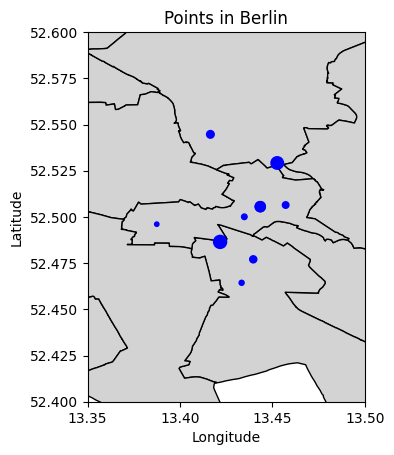

In [79]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# List of latitudes and longitudes
latitudes = df['Latitude']  # Replace with your latitudes
longitudes = df['Longitude']  # Replace with your longitudes
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    {
        'Latitude': latitudes,
        'Longitude': longitudes,
        "Rating": ratings,
        'Reviews': nr_reviews
    },
    geometry=[Point(lon, lat) for lon, lat in zip(longitudes, latitudes)]
)

# Load a map of Berlin (world basemap)
berlin = gpd.read_file('bezirksgrenzen.shp')

# Plot the map and the points
ax = berlin.plot(color='lightgrey', edgecolor='black')

# Plot points
gdf.plot(ax=ax, color='blue', markersize=gdf['Rating'] * gdf['Reviews'] / gdf['Reviews'].max() * 100 / 5.0)

# Set title and labels
plt.title("Points in Berlin")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

ax.set_xlim([13.35, 13.5])  # Longitude limits
ax.set_ylim([52.4, 52.6])  # Latitude limits (zooming in around Berlin)

plt.show()


## Code | C. Data cleaning and processing | 3 points
#### Recommended deadline: from October 18th until October 21st
#### Deadline: October 24th at 01:29 pm CET

In order to make data-driven decisions, you will need to clean the collected data, fill missing values, merge datasets etc.

Take some time to clean and process the collected data so that you can use it.

Organize the dataset into a structured format, such as a CSV file, HTML file, EXCEL file, and a table where each row represents the achieved data.

## Code | D. Compute relevant statistics | 2 points
#### Recommended deadline: from October 18th until October 21st
#### Deadline: October 24th at 01:29 pm CET

Get together as a group and ask yourselves: what business questions would you like to answer? For example:

- On which days are there maximum customer traffic?
- On which days do we expect to make more sales?
- How much inventory should we get? Why?
- Which impact would the weather conditions, local attractions or events have on your business?
- How would you like to develop the business in the future?
    - Do you wish to expand to new locations?
    - Launch a new product?
    - Target more elderly or young people?
    - Target vegetarian or book-worm people?

Compute descriptive statistics that inform you about the future of your business and enable you to answer the business questions.|


## Code | E. Clean and clear visualisations  | 3 points
#### Deadline: October 24th at 01:29 pm CET

Create **at least 3 data visualisations** that clearly state your point and support your decision-making. 


**Presentation: present each data visualisation and integrate them in your storytelling. Explain why they are relevant for your decision-making.**

## Presentation | 15 points
#### Deadline: October 24th during class

> Make a presentation about your business, the data you've collected and the direction you're taking the business in the next months.

**Presentation | 1. Description of unique business idea | 1 point**

Summarise the name and choice of business as well as location and the time of year it operates (you can add some branding, logo, etc.)


**Presentation | 2. Presentation of all the APIs used and how it serves your business | 3 points**

Present each API and explain why the collected data is relevant for your business.


**Presentation | 3. Presentation of the data cleaning and processing | 2 points**

Explain the steps your team took in order to get to a clean and structured dataset.


**Presentation | 4. Presentation of the statistics  & 5. Data visualisations | 5 points**

Display the statistics and relevant data visualisations that helped you make informed decisions about your business. The descriptive statistics and visualisations enable you to draw conclusions that take your business in one or the other direction. You need to explain how this information serves your business and the next steps you will take.

**Presentation | 6. Storytelling | 4 points**

Why did you pick this business idea? Why this name?

Who is your target audience? What problem does it solve?

What decisions did you make to make your business thrive in the future? What are your current challenges? Opportunities?

Can Data save your business or make it expand to new territories?


Create a good story!